In [141]:
import numpy as np
from scipy import ndimage
import mahotas as mh
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu
from skimage import io, segmentation, img_as_ubyte,color
from skimage.measure import label,regionprops
import matplotlib.pyplot as plt 

In [142]:
%matplotlib inline
%cd images

[Errno 2] No such file or directory: 'images'
/Users/keriabermudez/Dropbox/Imaging_Class/images


In [143]:
img = io.imread("cropped.tif")

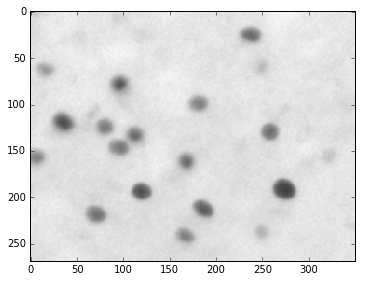

In [144]:
io.imshow(img)

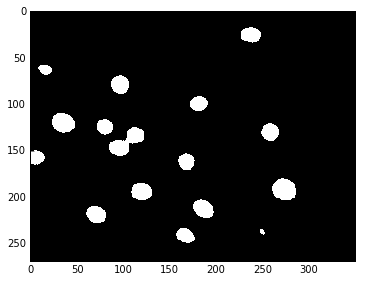

In [145]:
th = threshold_otsu(img)
binary = np.zeros_like(img,dtype=np.uint8)
binary[img < th] = 255
binary[img >= th] = 0
io.imshow(binary)
io.imsave("binary_cells.tif",binary)

In [146]:
labeling_structure = [[1,1,1],[1,1,1],[1,1,1]]   
labeled, num_cells = ndimage.label(binary, structure=labeling_structure)

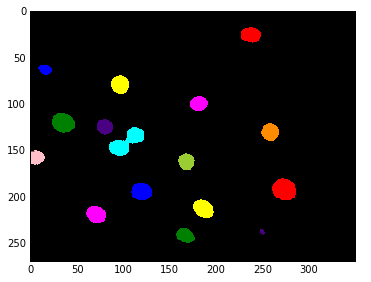

In [147]:
io.imshow(color.label2rgb(labeled, bg_label=0))
plt.imsave("labeled_cells.tif",color.label2rgb(labeled, bg_label=0))

In [148]:
props = regionprops(labeled)

In [149]:
cell_1 = props[0]

In [150]:
cell_1.area

287

In [151]:
marked = segmentation.mark_boundaries(img, labeled, color=[0,0,1], mode='outside')

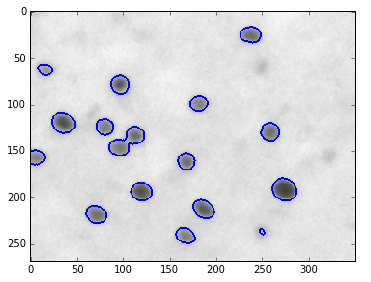

In [152]:
io.imshow(marked)
plt.imsave("cells_contours.tif",marked)


## Watershed Segmentation

In [153]:
distance = mh.distance(binary)

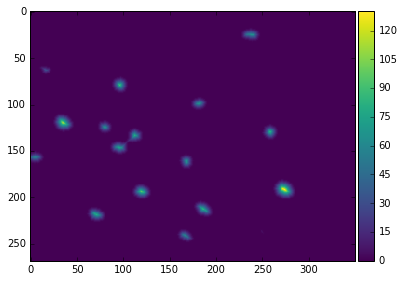

In [154]:
io.imshow(distance)
plt.imsave("distance.tif",distance)

In [155]:
distance = ndimage.gaussian_filter(distance, 3)

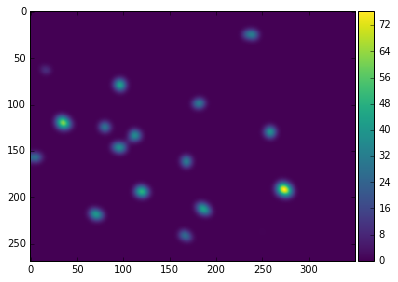

In [156]:
io.imshow(distance)
plt.imsave("distance_smoothed.tif",distance)

In [157]:
maxima = peak_local_max(distance, indices=False, exclude_border=False) #min_distance=10,

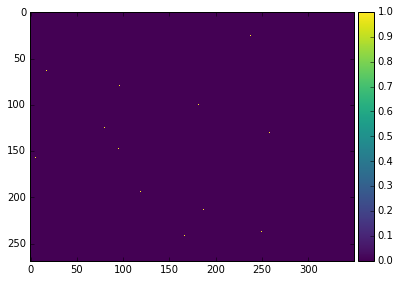

In [158]:
io.imshow(maxima)

In [159]:
surface = distance.max() - distance

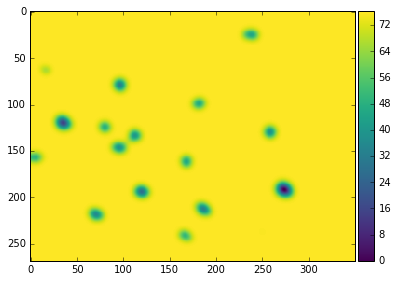

In [160]:
io.imshow(surface)
plt.imsave("surface.tif", surface)

In [161]:
markers, t = mh.label(maxima) 

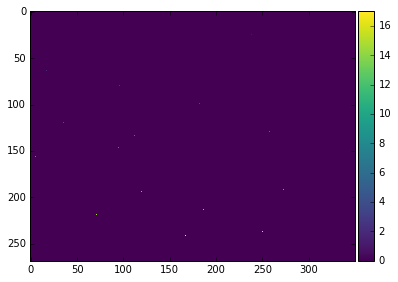

In [162]:
io.imshow(markers)
plt.imsave("markers.tif",markers)

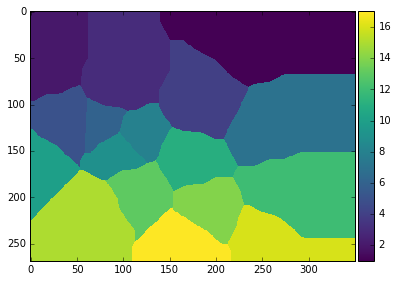

In [163]:
areas, lines = mh.cwatershed(surface, markers, return_lines=True) 
io.imshow(areas)

In [164]:
labeled_clusters, num_clusters= mh.label(binary, np.ones((3,3), bool))

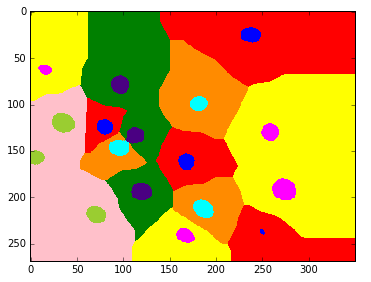

In [165]:
joined_labels = segmentation.join_segmentations(areas, labeled_clusters)
io.imshow(color.label2rgb(joined_labels, bg_label=0))

In [166]:
labeled_nucl = joined_labels * binary #eliminating background labels 

In [167]:
marked = segmentation.mark_boundaries(img, labeled_nucl, color=[0,0,1], mode='outside')

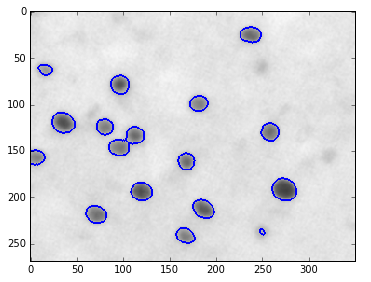

In [168]:
io.imshow(marked)
plt.imsave("marked_watershed.tif", marked)